In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
df = pd.read_csv("../input/covid-19-nlp-text-classification/Corona_NLP_train.csv",encoding='latin1')

In [3]:
no_classes=3

In [4]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [5]:
df.Sentiment.nunique()

5

In [6]:
df.Sentiment=df.Sentiment.replace({'Extremely Positive':'Positive','Extremely Negative':'Negative'})

In [7]:
df.Sentiment.nunique()

3

In [8]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(df.Sentiment)

In [9]:
lb.classes_

array(['Negative', 'Neutral', 'Positive'], dtype='<U8')

In [10]:
y.shape

(41157, 3)

In [11]:
df["OriginalTweet"]=df["OriginalTweet"].str.replace('[^\w\s]', '')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,MeNyrbie Phil_Gahan Chrisitv httpstcoiFz9FAn2P...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths to give elder...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,Me ready to go at supermarket during the COVID...,Negative


In [12]:
import nltk
from nltk.corpus import stopwords
sw=stopwords.words('english')
df["OriginalTweet"]=df["OriginalTweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,MeNyrbie Phil_Gahan Chrisitv httpstcoiFz9FAn2P...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths give elderly ...,Positive
3,3802,48754,NaN,16-03-2020,My food stock one empty PLEASE dont panic THER...,Positive
4,3803,48755,NaN,16-03-2020,Me ready go supermarket COVID19 outbreak Not I...,Negative


In [13]:
from textblob import Word, TextBlob
df["OriginalTweet"]=df["OriginalTweet"].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,MeNyrbie Phil_Gahan Chrisitv httpstcoiFz9FAn2P...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk neighbour family exchange phone nu...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths give elderly ...,Positive
3,3802,48754,NaN,16-03-2020,My food stock one empty PLEASE dont panic THER...,Positive
4,3803,48755,NaN,16-03-2020,Me ready go supermarket COVID19 outbreak Not I...,Negative


In [15]:
seqs = df['OriginalTweet']
lengths = [len(s) for s in seqs]

In [16]:
seqs

0        MeNyrbie Phil_Gahan Chrisitv httpstcoiFz9FAn2P...
1        advice Talk neighbour family exchange phone nu...
2        Coronavirus Australia Woolworths give elderly ...
3        My food stock one empty PLEASE dont panic THER...
4        Me ready go supermarket COVID19 outbreak Not I...
                               ...                        
41152    Airline pilot offering stock supermarket shelf...
41153    Response complaint provided citing COVID19 rel...
41154    You know itÂs getting tough KameronWilds ratio...
41155    Is wrong smell hand sanitizer starting turn co...
41156    TartiiCat Well newused Rift S going 70000 Amaz...
Name: OriginalTweet, Length: 41157, dtype: object

In [17]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer

max_length = max(lengths)
oov_token = "<OOV>"
tokenizer = Tokenizer(oov_token=oov_token)
tokenizer.fit_on_texts(seqs)

In [18]:
X_seq = tokenizer.texts_to_sequences(seqs)
X_seq = sequence.pad_sequences(X_seq, maxlen=max_length)

In [19]:
print(X_seq)

[[   0    0    0 ...    1    1    1]
 [   0    0    0 ... 1011 2678  118]
 [   0    0    0 ...    3   80    1]
 ...
 [   0    0    0 ...    1   30   34]
 [   0    0    0 ...    2    3    2]
 [   0    0    0 ...    3  777    1]]


In [20]:
#tokenizer.word_index

In [21]:
from tensorflow.keras.models import Sequential
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.layers.merge import Concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense,Dot,Conv1D,MaxPooling1D,Activation,Dropout,LSTM,Flatten,GlobalMaxPool1D,Input,BatchNormalization,Bidirectional

In [22]:
input1=Input(shape=(max_length,))
e = Embedding(len(tokenizer.word_index)+1,128)(input1)
lstm1=LSTM(64,return_sequences=True,dropout=0.5)(e)
gp1=GlobalMaxPool1D()(lstm1)
f1 = Flatten()(gp1)
d1 = Dense(32, activation='relu',kernel_regularizer='l2')(gp1)
dr1= Dropout(0.4)(d1)
d2 = Dense(32, activation='relu',kernel_regularizer='l2')(dr1)
dr2= Dropout(0.4)(d2)

In [23]:
output = Dense(no_classes, activation='softmax')(dr2)
model = Model(inputs=input1, outputs=output)

In [24]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [25]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 306)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 306, 128)          10834688  
_________________________________________________________________
lstm (LSTM)                  (None, 306, 64)           49408     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056  

In [26]:
from sklearn.model_selection import train_test_split
X_seq = np.array(X_seq)
X_train,X_test,y_train,y_test= train_test_split(X_seq,y,train_size=0.4,test_size=0.3,shuffle=True)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience = 2, 
                           mode='min', restore_best_weights=True)

In [28]:
history = model.fit(x=X_train, y=y_train, batch_size=256, epochs=10,validation_split=0.3,shuffle=True,callbacks=[early_stop])

Epoch 1/10
46/46 [==============================] - 13s 227ms/step - loss: 1.7436 - acc: 0.4160 - val_loss: 1.5006 - val_acc: 0.4402
Epoch 2/10
46/46 [==============================] - 10s 212ms/step - loss: 1.4476 - acc: 0.4243 - val_loss: 1.2496 - val_acc: 0.4402
Epoch 3/10
46/46 [==============================] - 9s 204ms/step - loss: 1.2147 - acc: 0.4448 - val_loss: 1.0390 - val_acc: 0.5975
Epoch 4/10
46/46 [==============================] - 9s 205ms/step - loss: 0.9704 - acc: 0.6140 - val_loss: 0.8774 - val_acc: 0.6629
Epoch 5/10
46/46 [==============================] - 9s 201ms/step - loss: 0.7473 - acc: 0.7471 - val_loss: 0.7971 - val_acc: 0.7293
Epoch 6/10
46/46 [==============================] - 10s 210ms/step - loss: 0.6359 - acc: 0.8330 - val_loss: 0.8584 - val_acc: 0.7226
Epoch 7/10
46/46 [==============================] - 9s 198ms/step - loss: 0.5328 - acc: 0.8697 - val_loss: 0.8765 - val_acc: 0.7214


In [29]:
model.save("model_nlp_deep.h5")

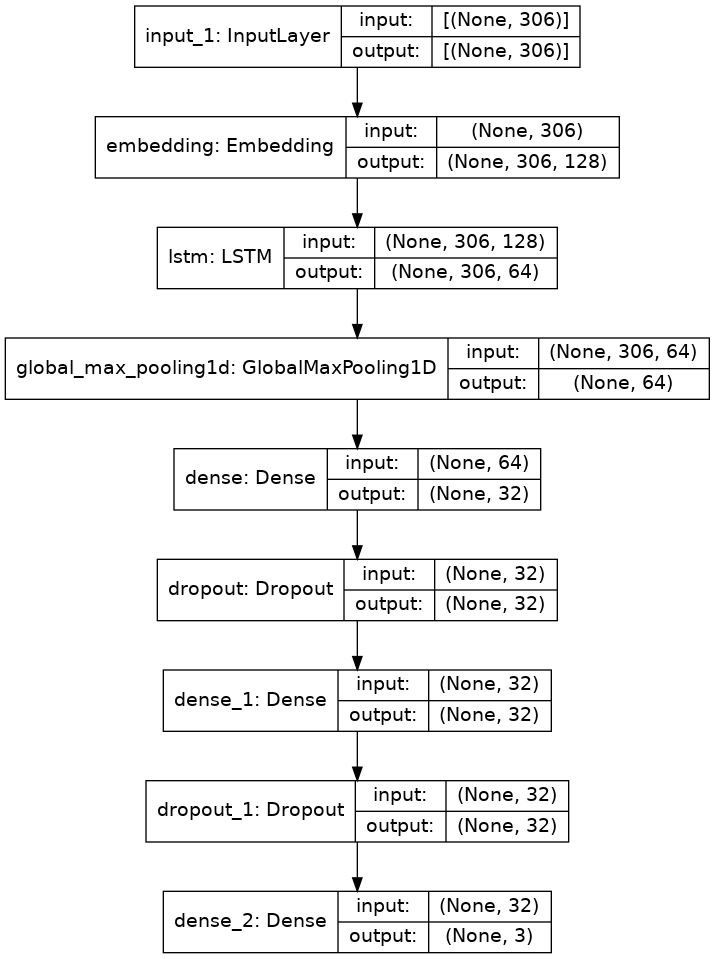

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))

In [33]:
print(y_pred)

[[0.9086952  0.01882428 0.07248053]
 [0.6951686  0.03500389 0.26982749]
 [0.28490493 0.37738392 0.33771116]
 ...
 [0.15032677 0.2075845  0.6420887 ]
 [0.30124733 0.37374827 0.32500434]
 [0.9071271  0.02021765 0.07265524]]


In [34]:
print("Evaluate on test df")
results = model.evaluate(X_test, y_test, batch_size=128)

Evaluate on test df
97/97 [==============================] - 1s 12ms/step - loss: 0.8116 - acc: 0.7301


In [35]:
print("Test Loss",results[0],"\nTest Accuracy:", results[1])

Test Loss 0.8115623593330383 
Test Accuracy: 0.7300777435302734


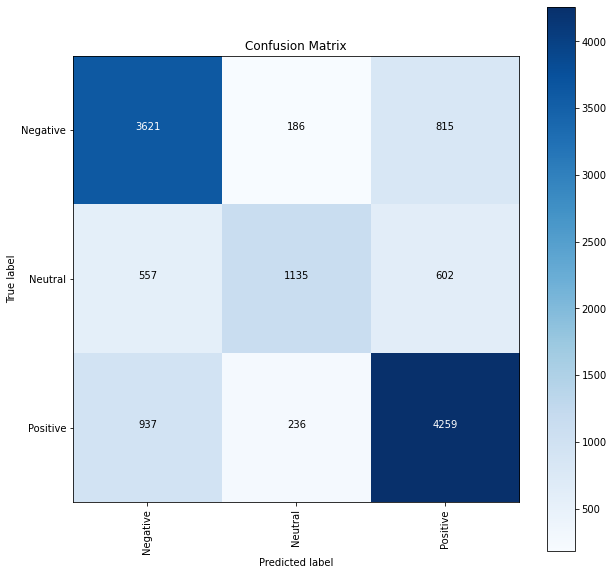

In [36]:
classes=['Negative', 'Neutral', 'Positive']
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(no_classes)
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
thresh = cm.max() / 2.
for i in range (cm.shape[0]):
    for j in range (cm.shape[1]):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
plt.show()

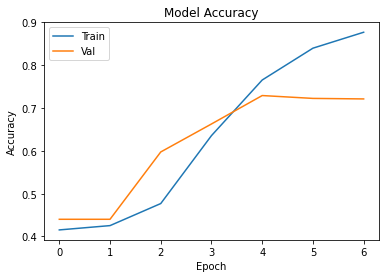

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

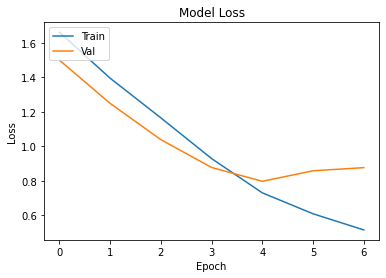

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [39]:
import numpy as np
y_test_arg=np.argmax(y_test,axis=1)
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_test_arg, np.argmax(y_pred, axis=1)))

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      4622
           1       0.73      0.49      0.59      2294
           2       0.75      0.78      0.77      5432

    accuracy                           0.73     12348
   macro avg       0.73      0.69      0.70     12348
weighted avg       0.73      0.73      0.73     12348



In [40]:
def predict_emotion(stri):
    df = pd.DataFrame([stri], columns=['tweet'])
    df["tweet"]=df["tweet"].str.replace('[^\w\s]', '')
    sw=stopwords.words('english')
    df["tweet"]=df["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    df["tweet"]=df["tweet"].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
    df['tweet'] = df['tweet'].str.replace('^0-9.\-', '')
    seeq = df['tweet']
    tokenizer.fit_on_texts(seeq)
    X_seq = tokenizer.texts_to_sequences(seeq)
    X_seq = sequence.pad_sequences(X_seq, maxlen=max_length)
    X_seq = np.array(X_seq)
    p=model.predict(X_seq)
    print(lb.classes_[np.argmax(p,axis=1)])

In [41]:
predict_emotion("Global stocks plummeted today due to fear surrounding #COVID2019 and falling oil prices, which saw the biggest one-day drop since the 1991 Gulf War")

['Negative']
